In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

import matplotlib.pyplot as plt

import os

from PIL import Image

In [2]:
# Constants
K_MEANS_THRESHOLD = 20
SUPTITLE_FONTSIZE = 26
TITLE_FONTSIZE = 18

In [3]:
# Directories
feed_dataset_dir = '../../feed-datasets' 
images_dir = '../../images/aculei-images'

In [4]:
dd = pd.read_pickle(feed_dataset_dir + '/aculei-numerical.pkl')
dd.head()

temperature  wild boar  porcupine       fox    badger    marten      wolf  \
0         25.0   0.970243   0.011796  0.011460  0.001555  0.001512  0.000991   
1         16.0   0.996869   0.002792  0.000112  0.000078  0.000033  0.000027   
2          9.0   0.084593   0.352572  0.188861  0.205791  0.131927  0.003121   
3         15.0   0.181697   0.263160  0.280894  0.010420  0.045404  0.011294   
4         19.0   0.000118   0.000149  0.942590  0.000321  0.048537  0.007341   

       deer      hare  squirrel  ...  season_winter  day_time_day  \
0  0.000947  0.000824  0.000282  ...              0             0   
1  0.000049  0.000013  0.000010  ...              0             0   
2  0.002608  0.004968  0.008771  ...              0             1   
3  0.020466  0.067673  0.004126  ...              0             1   
4  0.000033  0.000437  0.000366  ...              0             0   

   day_time_night  hunter_camera_1.0  hunter_camera_2.0  hunter_camera_3.0  \
0               1                  1                  0                  0   
1               1                  1                  0                  0   
2               0                  0                  0                  0   
3               0                  0                  0                  0   
4               1                  1                  0                  0   

   hunter_camera_4.0  hunter_camera_5.0  hunter_camera_6.0  hunter_camera_7.0  
0                  0                  0                  0                  0  
1                  0                  0                  0                  0  
2                  0                  0                  1                  0  
3                  0                  0                  1                  0  
4                  0                  0                  0                  0  

[5 rows x 29 columns]

In [5]:
mean_value = dd.temperature.mean()
dd.temperature.fillna(value=mean_value, inplace=True)

In [6]:
x = dd.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dd = pd.DataFrame(x_scaled, columns=dd.columns)

In [7]:
dd.head()

temperature  wild boar  porcupine       fox    badger    marten      wolf  \
0     0.738095   0.970339   0.011797  0.011498  0.001561  0.001526  0.001119   
1     0.523810   0.996969   0.002792  0.000111  0.000077  0.000033  0.000030   
2     0.357143   0.084600   0.352599  0.189490  0.206726  0.133163  0.003526   
3     0.500000   0.181714   0.263180  0.281831  0.010466  0.045829  0.012760   
4     0.595238   0.000117   0.000149  0.945735  0.000321  0.048991  0.008293   

       deer      hare  squirrel  ...  season_winter  day_time_day  \
0  0.000951  0.000833  0.000314  ...            0.0           0.0   
1  0.000049  0.000013  0.000010  ...            0.0           0.0   
2  0.002619  0.005028  0.009804  ...            0.0           1.0   
3  0.020556  0.068491  0.004612  ...            0.0           1.0   
4  0.000033  0.000442  0.000409  ...            0.0           0.0   

   day_time_night  hunter_camera_1.0  hunter_camera_2.0  hunter_camera_3.0  \
0             1.0                1.0                0.0                0.0   
1             1.0                1.0                0.0                0.0   
2             0.0                0.0                0.0                0.0   
3             0.0                0.0                0.0                0.0   
4             1.0                1.0                0.0                0.0   

   hunter_camera_4.0  hunter_camera_5.0  hunter_camera_6.0  hunter_camera_7.0  
0                0.0                0.0                0.0                0.0  
1                0.0                0.0                0.0                0.0  
2                0.0                0.0                1.0                0.0  
3                0.0                0.0                1.0                0.0  
4                0.0                0.0                0.0                0.0  

[5 rows x 29 columns]

In [8]:
dd.drop(columns=['temperature', 'season_autumn', 'season_spring', 'season_summer',
       'season_winter', 'day_time_day', 'day_time_night'], inplace=True)

Explained Variance Ratio: [1.54550378e-01 8.97049936e-02 7.73384082e-02 6.67960656e-02
 6.34221188e-02 5.32726174e-02 4.96294074e-02 4.78283977e-02
 4.55735672e-02 4.52386679e-02 4.13474503e-02 4.04344616e-02
 3.72621398e-02 3.70207505e-02 3.21951512e-02 3.01073093e-02
 2.47208973e-02 2.36624787e-02 2.05731074e-02 1.70471077e-02
 2.27452434e-03 8.83446638e-16]


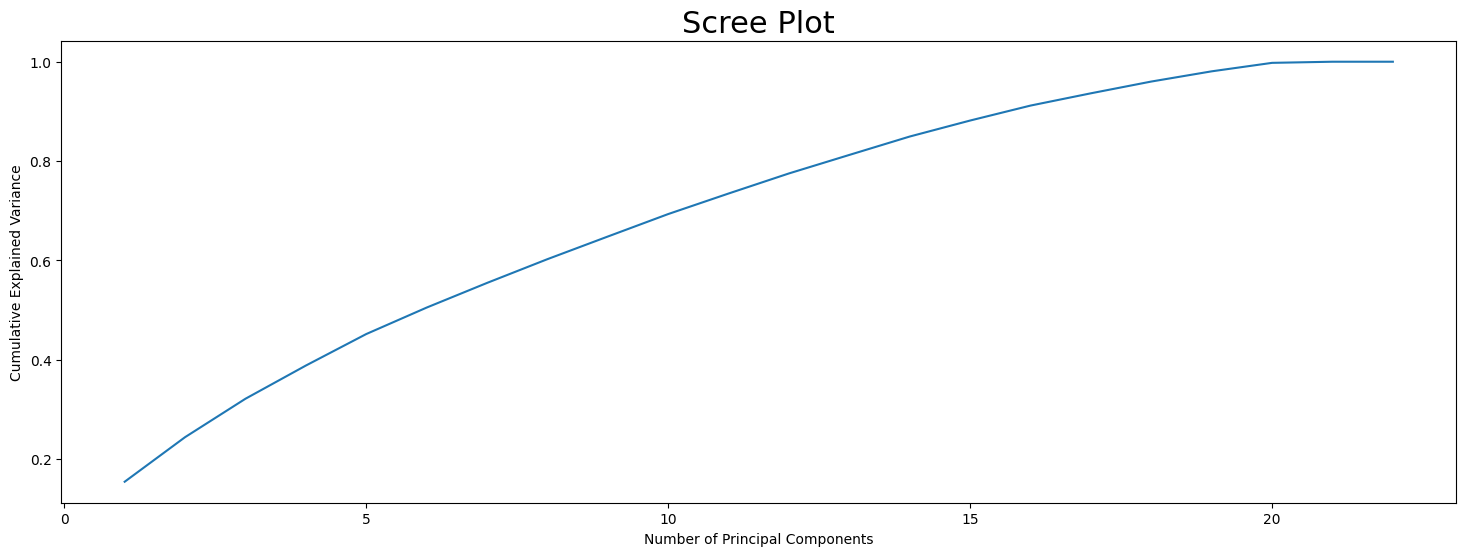

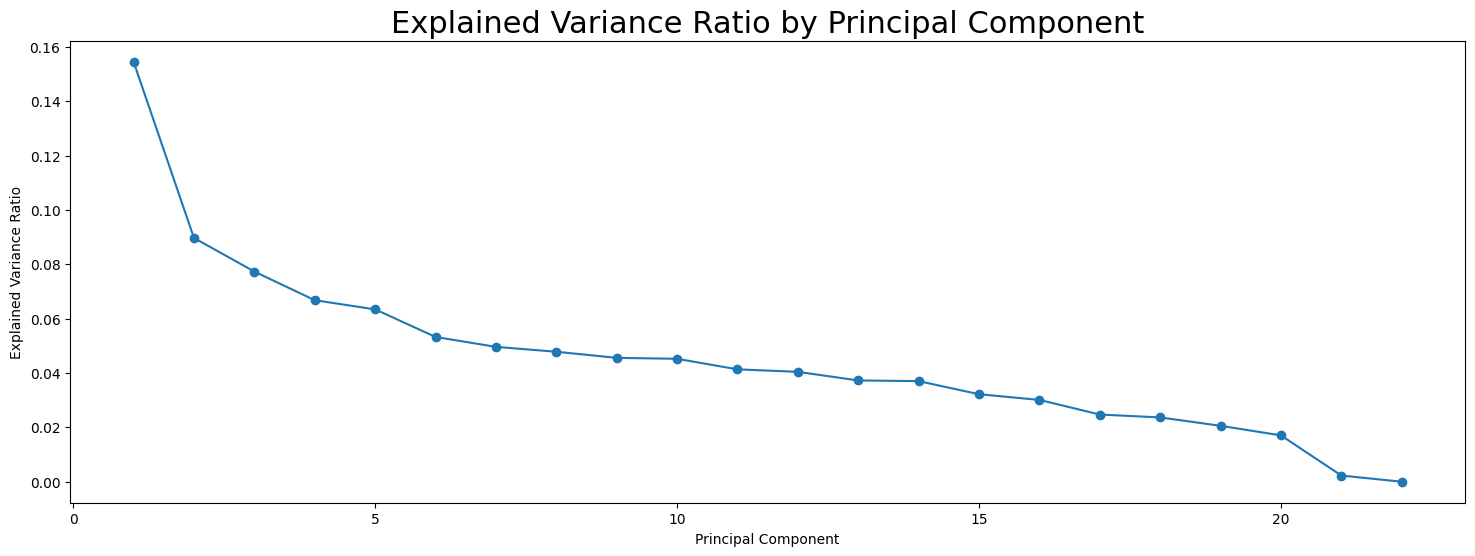

Principal Components:
[[-4.96058256e-01  1.13861858e-01  2.96155112e-01  9.41142686e-02
   2.20841873e-01  2.36354843e-01  2.03925468e-01  2.07317009e-01
   2.12507611e-01  1.53952693e-01  1.69865633e-01  9.77820483e-02
   1.48039637e-01  8.15758855e-02  7.73251979e-02 -4.46524388e-01
   4.04286451e-02  1.65991529e-01  2.00385353e-01  1.00567844e-01
   1.72423670e-01  6.92801295e-02]
 [ 1.06307177e-01 -9.43644659e-02  8.09990844e-03 -1.78674876e-01
  -8.32890918e-02  3.04227807e-01  9.71108072e-02 -1.54251292e-01
   1.10983561e-01  1.12621364e-01  3.17680590e-01 -3.67173846e-01
   2.73895962e-01  2.24132575e-01 -2.24723310e-01  8.96253079e-02
   1.88263583e-02  3.52236077e-01  4.50247915e-02 -2.56366648e-02
  -4.86720910e-01 -8.09668241e-02]
 [ 3.02908341e-02 -3.30719295e-01 -1.32702516e-02 -1.67503151e-01
  -3.36921171e-01  1.00795553e-01  2.14654139e-02  1.05189902e-01
  -1.41367782e-01  4.34136624e-02  1.98529743e-01  3.60349643e-01
   1.66677267e-01  2.09401444e-01  2.57122339e-01 

wild boar  porcupine       fox    badger    marten      wolf      deer  \
0  -0.496058   0.113862  0.296155  0.094114  0.220842  0.236355  0.203925   
1   0.106307  -0.094364  0.008100 -0.178675 -0.083289  0.304228  0.097111   
2   0.030291  -0.330719 -0.013270 -0.167503 -0.336921  0.100796  0.021465   
3  -0.064959   0.193762 -0.263303  0.344171  0.166893 -0.060143 -0.220726   
4   0.050962   0.026379  0.182185  0.138771  0.190168  0.193639 -0.386445   
5   0.043143   0.188282 -0.238100 -0.183186 -0.090264  0.010770  0.183716   
6   0.130422  -0.136177 -0.323994  0.290319 -0.046232  0.073533  0.293213   
7  -0.063779   0.597467 -0.069375 -0.417273 -0.355899  0.087495 -0.069938   
8   0.091567  -0.153671 -0.239006  0.039629  0.103494 -0.157208 -0.099126   
9   0.020231   0.196002 -0.055624 -0.035581 -0.204875 -0.001082  0.138418   

       hare  squirrel   buzzard  ...       cat     horse     heron  \
0  0.207317  0.212508  0.153953  ...  0.148040  0.081576  0.077325   
1 -0.154251  0.110984  0.112621  ...  0.273896  0.224133 -0.224723   
2  0.105190 -0.141368  0.043414  ...  0.166677  0.209401  0.257122   
3 -0.375778 -0.164474 -0.126345  ...  0.087346  0.384863  0.061365   
4 -0.017712  0.025600  0.074192  ...  0.406641 -0.425420  0.031011   
5 -0.070334  0.187220 -0.082060  ...  0.173850 -0.192295  0.165372   
6 -0.242678 -0.184116 -0.090595  ...  0.146106 -0.175769  0.146873   
7 -0.038309 -0.108434  0.261161  ... -0.049616 -0.058741  0.219710   
8 -0.221463  0.286462  0.515211  ... -0.029666  0.019791  0.497971   
9 -0.067849 -0.294739 -0.344147  ...  0.122381 -0.023738 -0.082852   

   hunter_camera_1.0  hunter_camera_2.0  hunter_camera_3.0  hunter_camera_4.0  \
0          -0.446524           0.040429           0.165992           0.200385   
1           0.089625           0.018826           0.352236           0.045025   
2           0.048972          -0.023088           0.251603          -0.236932   
3          -0.114957          -0.019067           0.326332          -0.293367   
4           0.223043           0.089525          -0.249041          -0.168506   
5          -0.036419          -0.064482          -0.063297          -0.370504   
6          -0.174635          -0.406246          -0.163542           0.466746   
7          -0.017870          -0.183811          -0.010201           0.121753   
8          -0.091113           0.405782          -0.044500           0.121101   
9          -0.188596           0.753914          -0.114869           0.157346   

   hunter_camera_5.0  hunter_camera_6.0  hunter_camera_7.0  
0           0.100568           0.172424           0.069280  
1          -0.025637          -0.486721          -0.080967  
2          -0.232759           0.361221          -0.300607  
3          -0.011704           0.082113           0.358814  
4          -0.182386           0.080181           0.154813  
5           0.708681           0.024594          -0.091246  
6          -0.072717           0.040295          -0.040927  
7          -0.237848          -0.029477           0.279449  
8          -0.032038          -0.051015          -0.103026  
9          -0.037755           0.005103          -0.057504  

[10 rows x 22 columns]

In [9]:
scaler = StandardScaler()

# Extract features
features = dd.copy()

# Standardize the features
features_standardized = scaler.fit_transform(features)

# Perform pca analyzing all features
pca = PCA(n_components=features.shape[1])
principal_components = pca.fit_transform(features_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Scree Plot
plt.figure(figsize=(18, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio))
plt.title('Scree Plot', fontsize=22)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Plotting the explained variance ratio
plt.figure(figsize=(18, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio by Principal Component', fontsize=22)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Individual components contributions
components = pca.components_
print("Principal Components:")
print(components)

# Set a threshold for cumulative explained variance
threshold = 0.95

# Find the number of components that meet the threshold
num_components = np.argmax(np.cumsum(explained_variance_ratio) >= threshold) + 1

print(f"Number of components to retain for {threshold * 100}% cumulative explained variance: {num_components}")

# Then use this number when applying PCA
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(features_standardized)

loadings = pca.components_

# Display the loadings in a DataFrame for better readability
loadings_df = pd.DataFrame(loadings, columns=dd.columns)

# Show the loadings for the first few principal components
print("Loadings for the first few principal components:")
loadings_df.head(10)

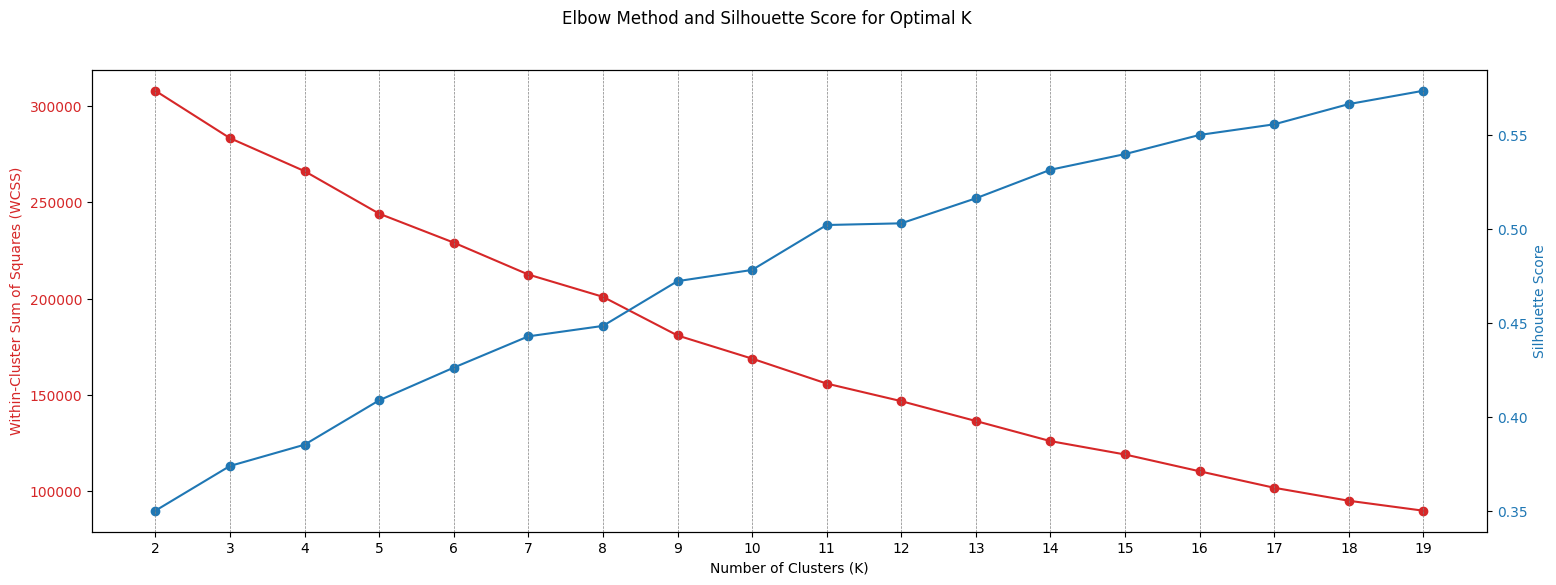

In [10]:
# Calculate the within-cluster sum of squares (WCSS) for different values of K
wcss = []
silhouette_scores = []

for k in range(2, K_MEANS_THRESHOLD):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(principal_components)
    wcss.append(kmeans.inertia_)
    
    if k > 1:
        silhouette_scores.append(silhouette_score(principal_components, cluster_labels))

# Plotting both Elbow Method and Silhouette Score
fig, ax1 = plt.subplots(figsize=(18, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', color=color)
ax1.plot(range(2, K_MEANS_THRESHOLD), wcss, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range(2, K_MEANS_THRESHOLD), silhouette_scores, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(range(2, K_MEANS_THRESHOLD))

for i, k in enumerate(range(2, K_MEANS_THRESHOLD)):
    plt.axvline(x=k, linestyle='--', color='gray', linewidth=0.5)

fig.suptitle('Elbow Method and Silhouette Score for Optimal K')
plt.show()


In [11]:
K = 17
model = KMeans(n_clusters=K, random_state=42)

# fitting data
model.fit(principal_components)

# predictions
cluster_labels_pca = model.predict(principal_components)

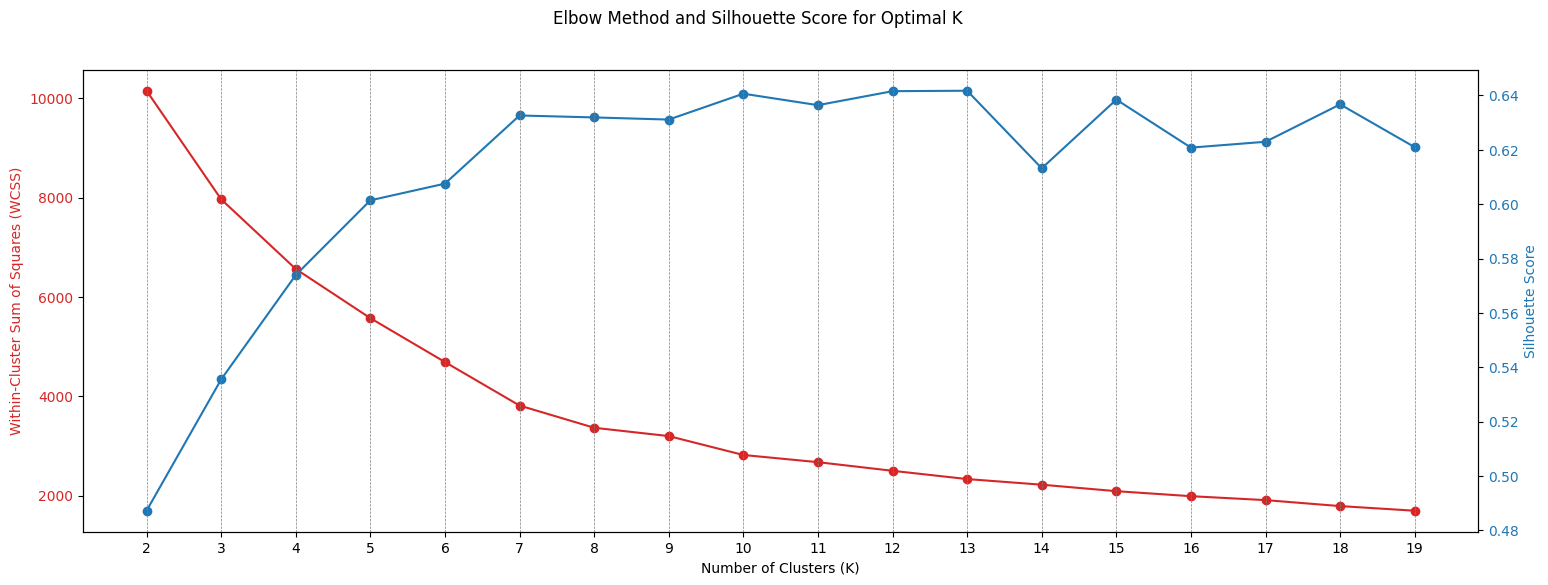

In [12]:
# Calculate the within-cluster sum of squares (WCSS) for different values of K
wcss = []
silhouette_scores = []

for k in range(2, K_MEANS_THRESHOLD):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(dd)
    wcss.append(kmeans.inertia_)
    
    if k > 1:
        silhouette_scores.append(silhouette_score(dd, cluster_labels))

# Plotting both Elbow Method and Silhouette Score
fig, ax1 = plt.subplots(figsize=(18, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', color=color)
ax1.plot(range(2, K_MEANS_THRESHOLD), wcss, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range(2, K_MEANS_THRESHOLD), silhouette_scores, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(range(2, K_MEANS_THRESHOLD))

for i, k in enumerate(range(2, K_MEANS_THRESHOLD)):
    plt.axvline(x=k, linestyle='--', color='gray', linewidth=0.5)

fig.suptitle('Elbow Method and Silhouette Score for Optimal K')
plt.show()

In [13]:
K = 9
model = KMeans(n_clusters=K, random_state=42)

# fitting data
model.fit(dd)

# predictions
cluster_labels = model.predict(dd)

# adding the results to the df cluster
dd['cluster'] = cluster_labels

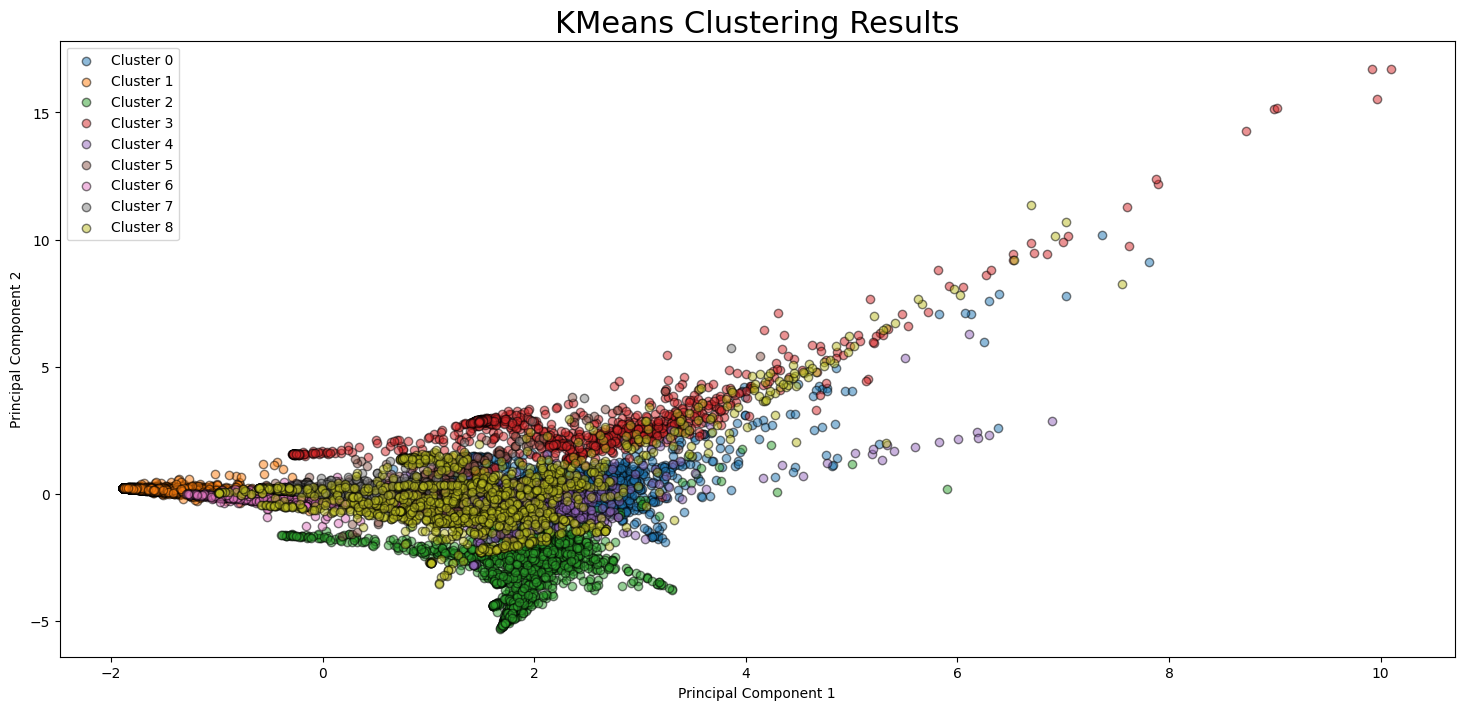

In [14]:
features = dd.drop(columns=['cluster'])

# Perform PCA to reduce dimensionality to 2 components
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_standardized)

# Add the 'cluster' column to the reduced DataFrame
reduced_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
reduced_df['cluster'] = cluster_labels

# Plotting the results
plt.figure(figsize=(18, 8))
for cluster in range(K):
    cluster_points = reduced_df[reduced_df['cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {cluster}', ec='black', alpha=0.5)

plt.title('KMeans Clustering Results', fontsize=22)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

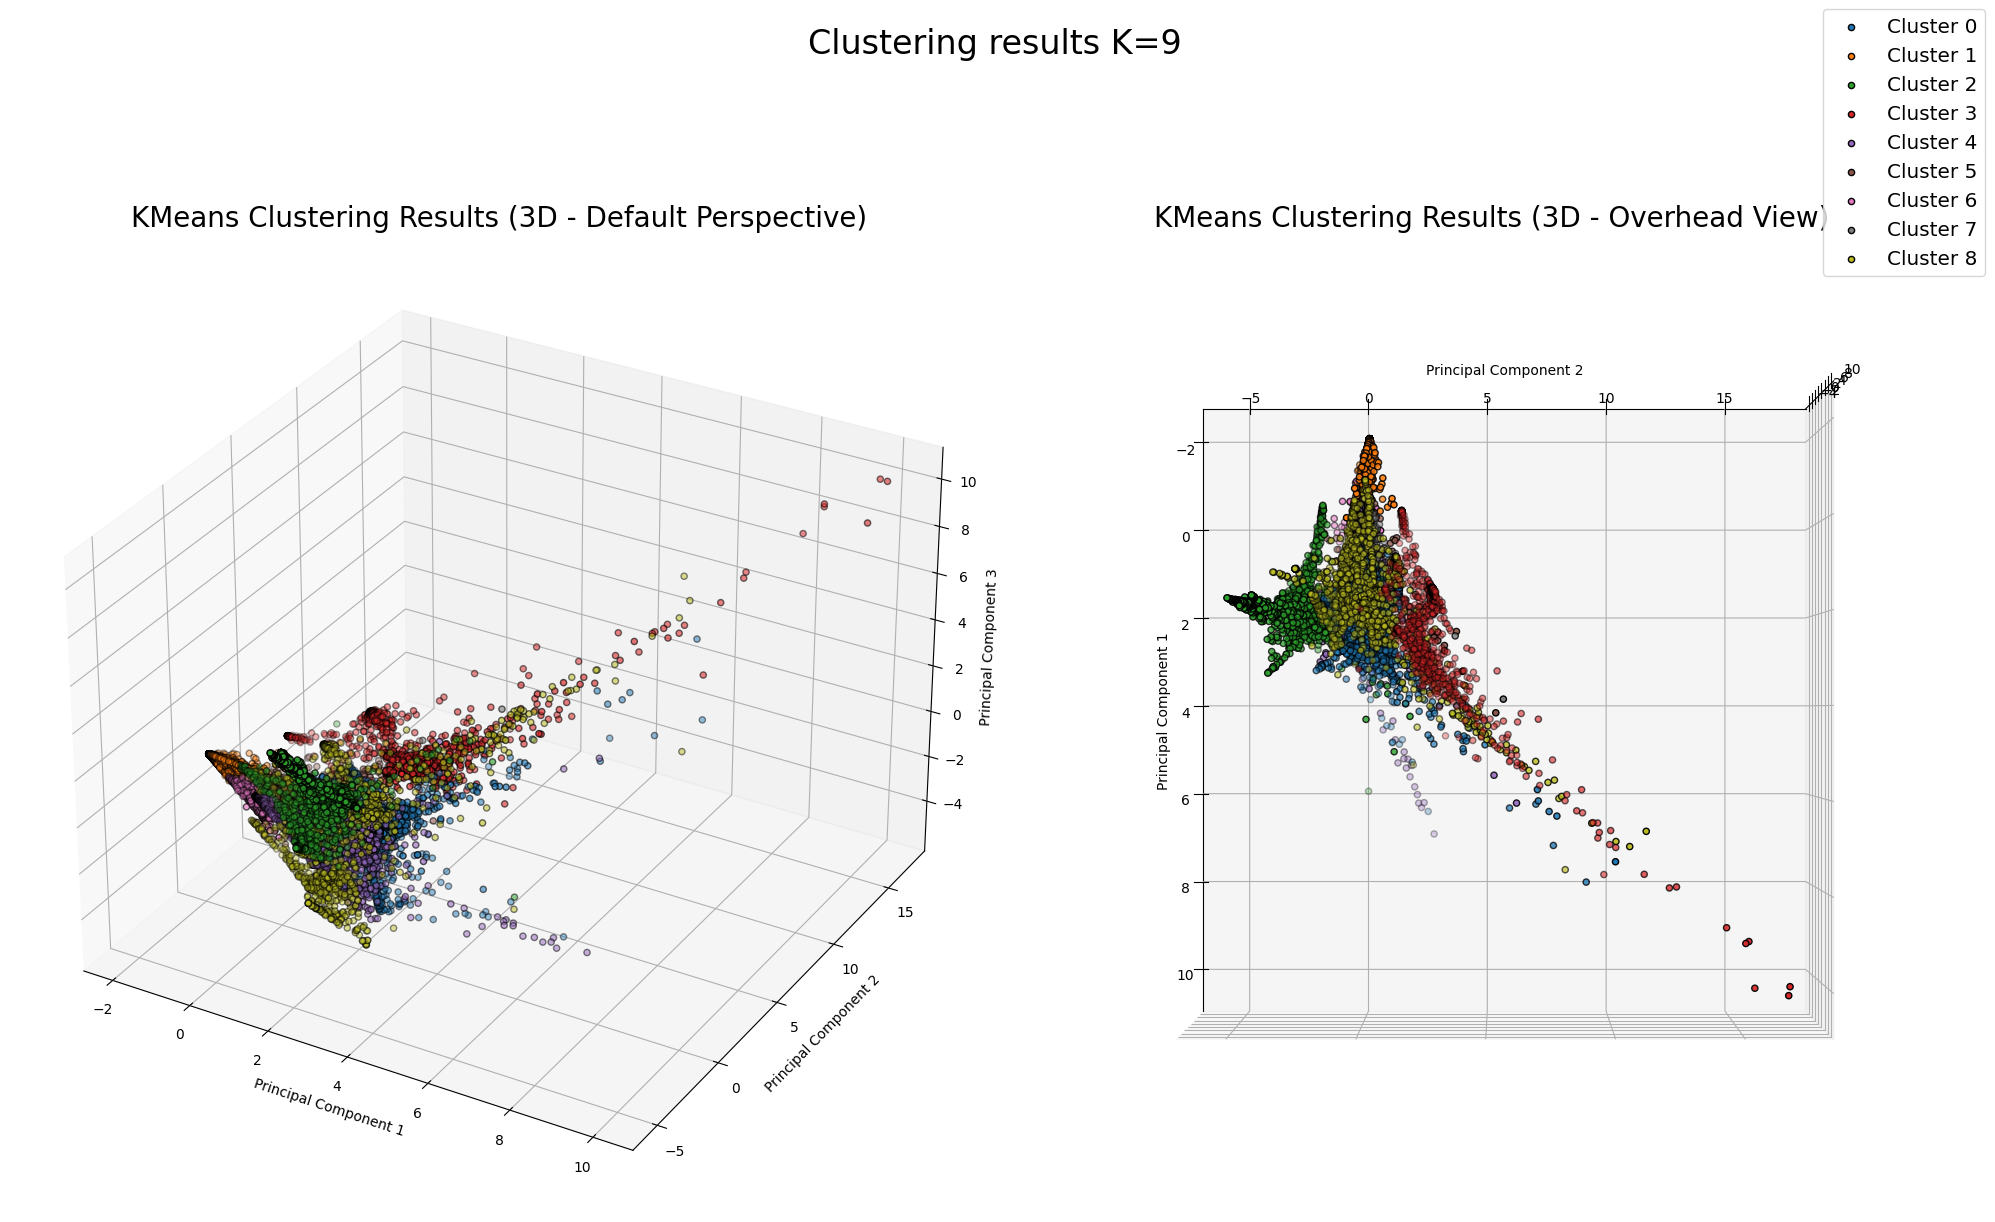

In [15]:
features = dd.drop(columns=['cluster'])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Perform PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features_standardized)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 4)])

# Add the 'cluster' column to the reduced DataFrame
pc_df['cluster'] = cluster_labels

# Plotting the results in 3D with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 14), subplot_kw={'projection': '3d'})

# Plot 1 - Default Perspective
ax1 = axes[0]
for cluster in range(K):
    cluster_points = pc_df[pc_df['cluster'] == cluster]
    ax1.scatter(cluster_points['PC1'], cluster_points['PC2'], cluster_points['PC3'], label=f'Cluster {cluster}', ec='black')

ax1.set_title('KMeans Clustering Results (3D - Default Perspective)', fontsize=20)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')

# Plot 2 - Overhead Perspective
ax2 = axes[1]
for cluster in range(K):
    cluster_points = pc_df[pc_df['cluster'] == cluster]
    ax2.scatter(cluster_points['PC1'], cluster_points['PC2'], cluster_points['PC3'], label=f'Cluster {cluster}', ec='black')

ax2.set_title('KMeans Clustering Results (3D - Overhead View)', fontsize=20)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
#ax2.set_zlabel('Principal Component 3')

# Set the view to an overhead perspective for the second plot
ax2.view_init(elev=90, azim=0)

# Increase the legend fontsize
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize='x-large')

fig.suptitle(f"Clustering results K={K}", fontsize=24)
plt.tight_layout()
plt.show()

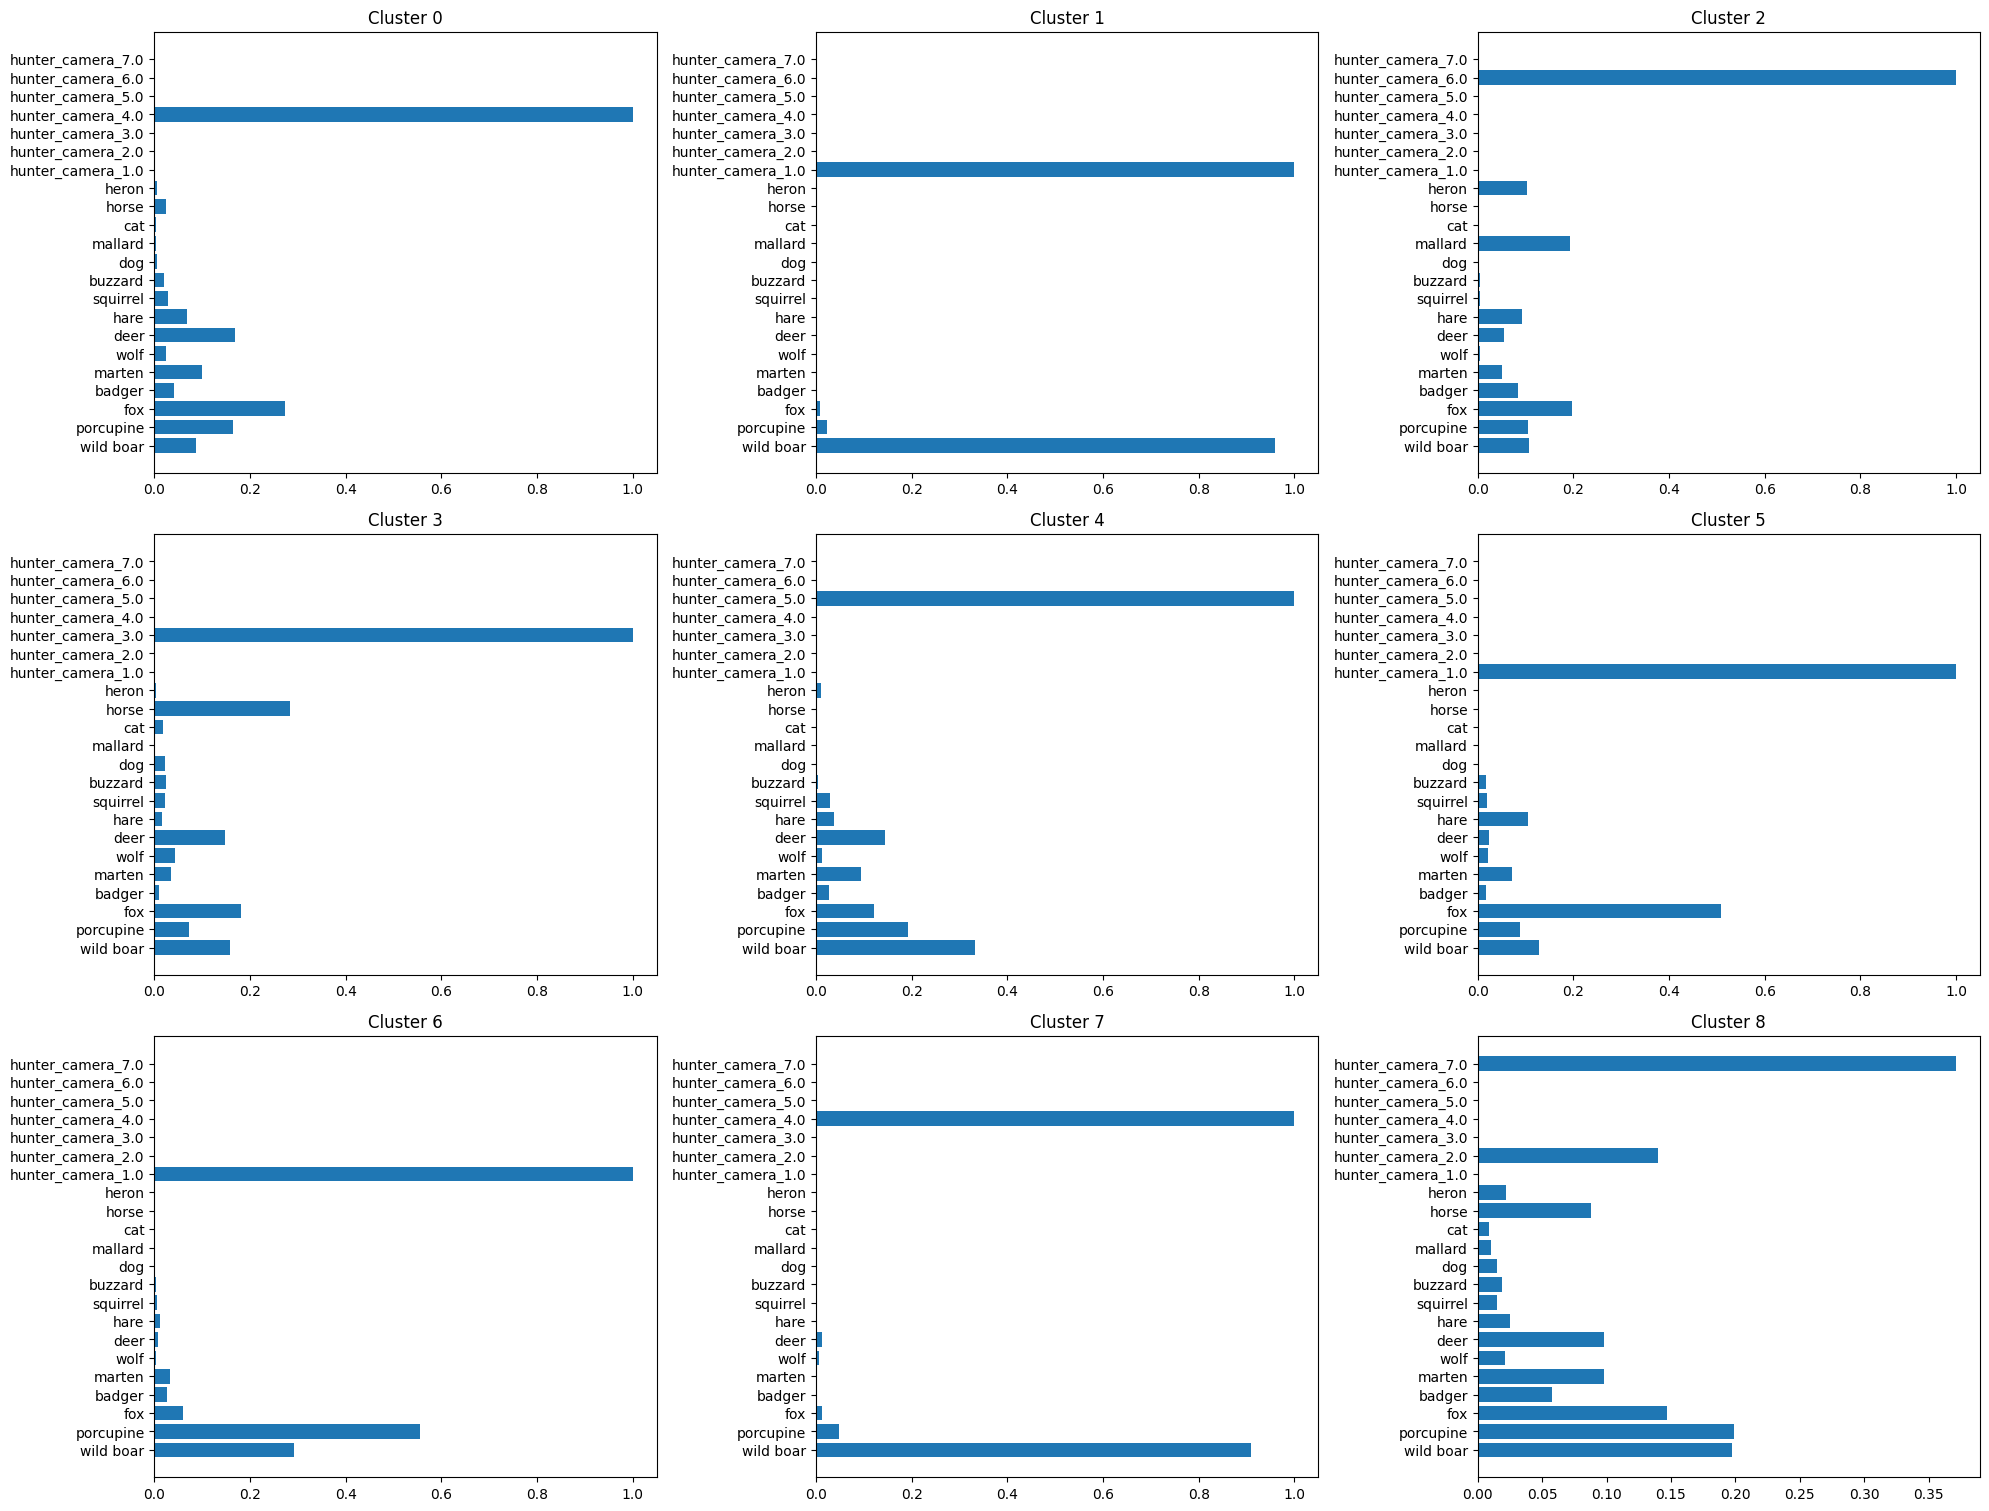

In [16]:
centroids = model.cluster_centers_

# Create a DataFrame with centroids and feature names
centroid_df = pd.DataFrame(data=centroids, columns=features.columns)

# Visualize feature importance
num_clusters = model.n_clusters
rows = 4
cols = int(np.ceil(num_clusters / rows))

plt.figure(figsize=(20, 20))
for i in range(num_clusters):
    plt.subplot(rows, cols, i + 1)
    plt.barh(features.columns, centroid_df.iloc[i, :])
    plt.title(f'Cluster {i}')
    plt.tight_layout()

plt.show()


In [17]:
centroid_df.to_pickle(feed_dataset_dir + '/clusters.pkl')

In [18]:
df = pd.read_csv(feed_dataset_dir + '/aculei.csv', index_col=0)

In [19]:
df['cluster'] = cluster_labels

In [20]:
df.head()

animal  hunter_camera  temperature      moon_phase            date_time  \
0  wild boar            1.0         25.0       full_moon  2021-07-22 23:04:07   
1  wild boar            1.0         16.0       full_moon  2021-05-27 22:01:44   
2  porcupine            6.0          9.0   first_quarter  2023-03-30 20:35:58   
3        fox            6.0         15.0  waxing_gibbous  2022-06-09 21:29:59   
4        fox            1.0         19.0   first_quarter  2021-06-16 23:41:09   

   season day_time   bird  water_animal  predatory_animal  domestic_animal  \
0  summer    night  False         False             False            False   
1  spring    night  False         False             False            False   
2  spring      day  False         False             False            False   
3  summer      day  False         False              True            False   
4  summer    night  False         False              True            False   

   herbivore  night_animal animal_size                    image_name  \
0       True         False           m   TF_ACULEI_8040_DSCF0129.jpg   
1       True         False           m    TF_ACULEI_900_DSCF0756.jpg   
2       True         False          xs  TF_ACULEI_15294_DSCF0133.jpg   
3      False          True           s  TF_ACULEI_11374_DSCF0064.jpg   
4      False          True           s   TF_ACULEI_4106_DSCF4336.jpg   

                                              sha256  cluster  
0  00917733a6aa7e574a2da861dc75b70f5e38db45b50983...        1  
1  01b46bf7f72f5ecd35669d876892619192c50771d44949...        1  
2  a4080d64cc86785ee8ab82468db78b14e4ddb9838faef6...        2  
3  314a99154f1709a8a6ac99069b1af4cebf0cc9df089ce4...        2  
4  f1c6a3c629f9fb55975f6e02eeeccbd708477ddcf574e5...        5

In [21]:
df.to_pickle(feed_dataset_dir + '/aculei-only-animals.pkl')

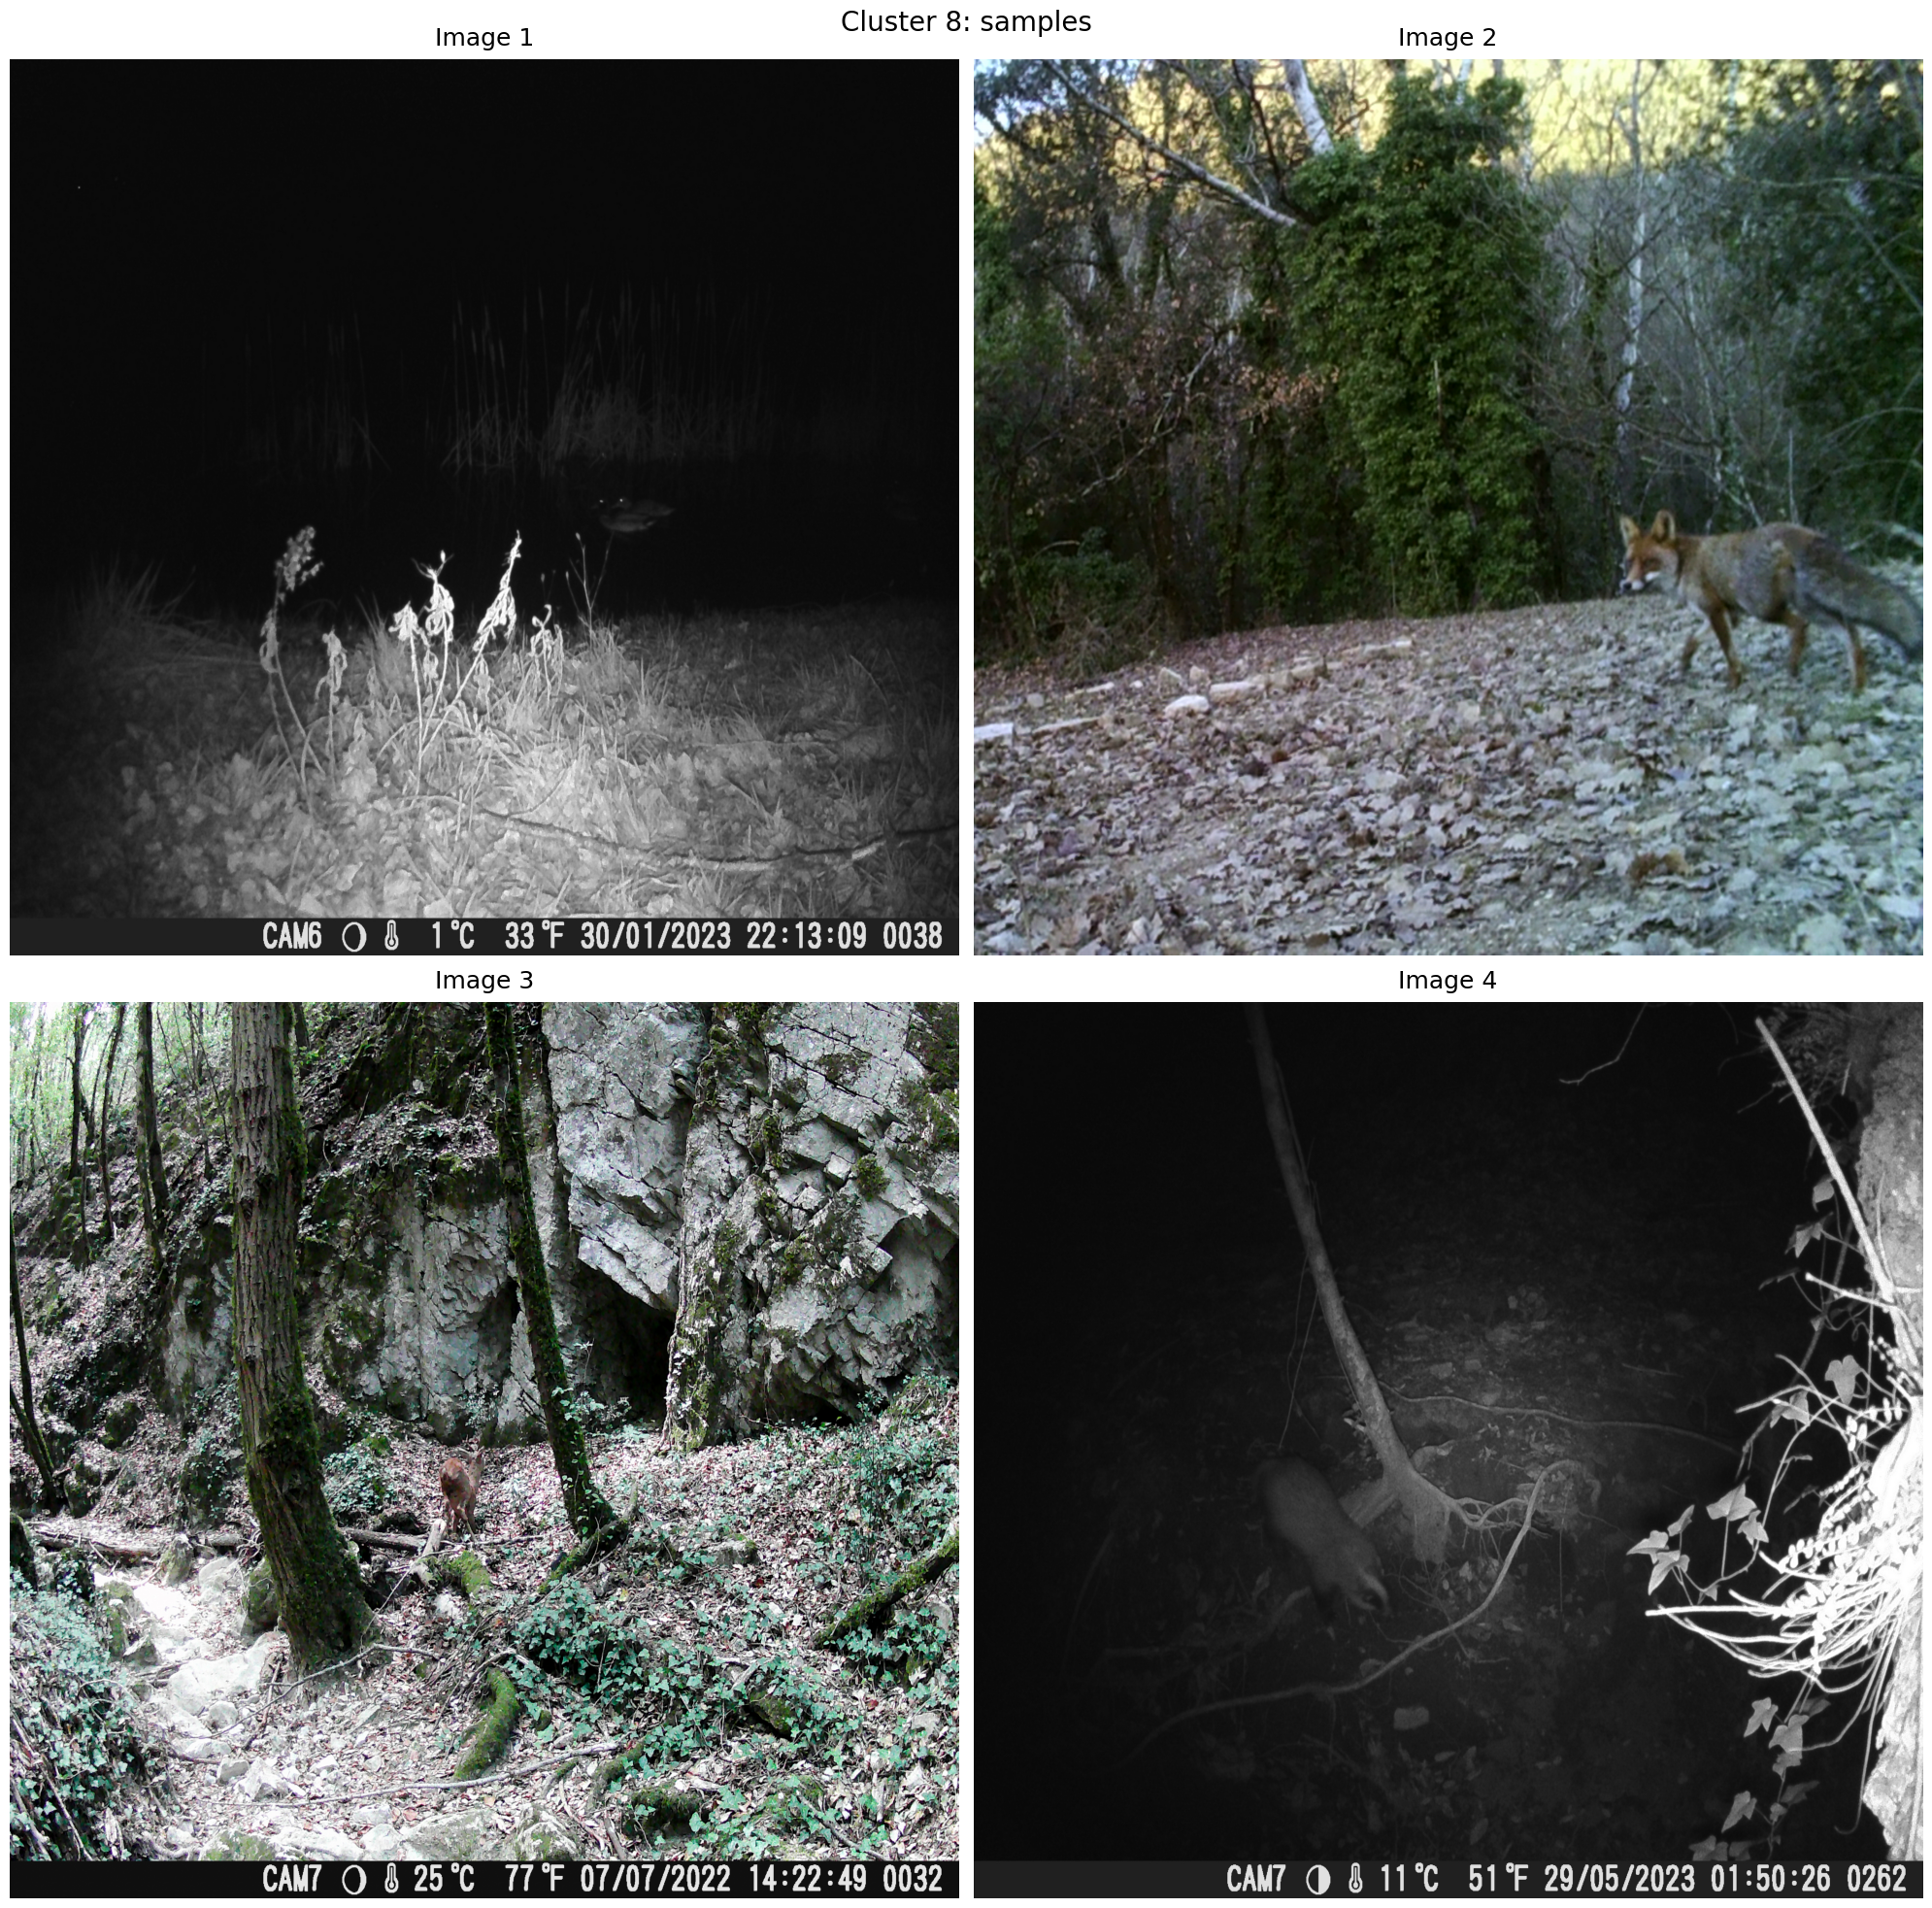

In [22]:
def plot_images_for_cluster(df, cluster, num_images=4):
    cluster_images = df[df['cluster'] == cluster]['image_name'].sample(num_images)

    fig, axes = plt.subplots(2, 2, figsize=(20, 20))

    for i, ax in enumerate(axes.flatten()):
        if i < num_images:
            image_name = cluster_images.iloc[i]
            image_path = os.path.join(images_dir, image_name)
            image = Image.open(image_path)

            ax.imshow(image, aspect='auto')
            ax.axis('off')
            ax.set_title(f"Image {i + 1}", fontsize=18, pad=10)

    fig.suptitle(f"Cluster {cluster}: samples", fontsize=20)
    plt.tight_layout()
    plt.show()

plot_images_for_cluster(df, cluster=8, num_images=4)